In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

The below code inputs dataset from cloud and stores it to google colab

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:55<00:00, 19.1MB/s]
100% 1.06G/1.06G [00:55<00:00, 20.5MB/s]


# Main Code Starts here


In [ ]:
# This Code unzips the kaggle dataset file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
# https://keras.io/api/data_loading/image/
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int', # For cat -0 , For Dog - 1
    batch_size=32,
    image_size=(256,256) # Resizeing dataset
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
# To make all pixel values of each image to 0-1 from 0-255
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## We have used CNN for our Model

In [ ]:
# create CNN model

model = Sequential()
# 1st layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# 2nd layer
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#3rd layer
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# Indicates Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Below We Train our Model
We have used 10 Epochs i.e we have segmented the data set into 10  parts and will be training them part by part



In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 84s 112ms/step - loss: 1.4740 - accuracy: 0.5950 - val_loss: 0.6796 - val_accuracy: 0.5956
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5794 - accuracy: 0.7044 - val_loss: 0.5245 - val_accuracy: 0.7388
Epoch 3/10
625/625 [==============================] - 69s 111ms/step - loss: 0.4914 - accuracy: 0.7653 - val_loss: 0.5340 - val_accuracy: 0.7326
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4238 - accuracy: 0.8047 - val_loss: 0.5611 - val_accuracy: 0.7362
Epoch 5/10
625/625 [==============================] - 70s 112ms/step - loss: 0.3623 - accuracy: 0.8414 - val_loss: 0.5824 - val_accuracy: 0.7642
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2908 - accuracy: 0.8741 - val_loss: 0.4562 - val_accuracy: 0.8136
Epoch 7/10
625/625 [==============================] - 70s 111ms/step - loss: 0.2387 - accuracy: 0.9035 - val_loss: 0.6419 - val_ac

# Data Visualization

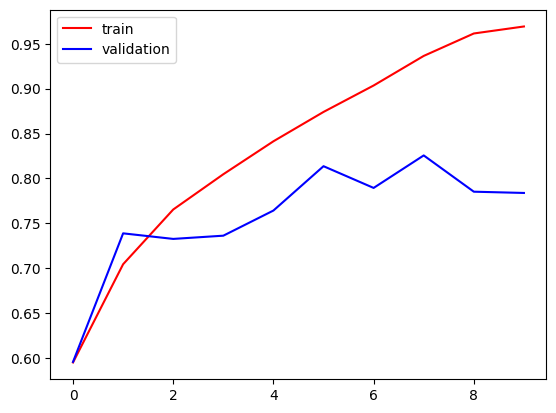

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

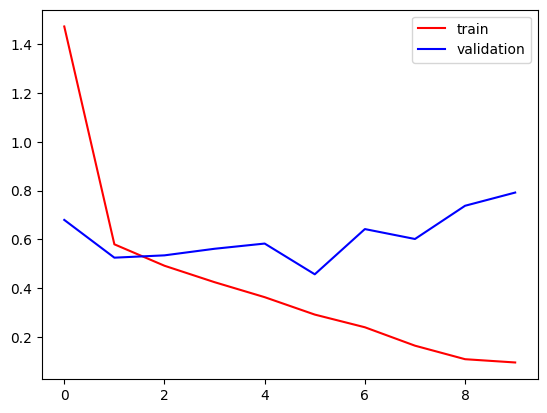

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Now Testing starts below

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

Below command will display the testing image in BGR Format

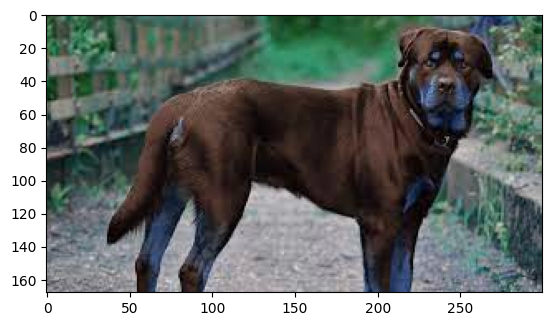

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape # Indicates orignal size of the image

(168, 300, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256)) # Resizing the image according to dataset

In [ ]:
test_input = test_img.reshape((1,256,256,3))

# Main OUTPUT
0 - For CAT

1 - For DOG

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)